In [1]:
import os, sys
# module_path = os.path.abspath(os.path.join('../../Prompt-based-class-incremental-learning-in-Federated-Learning/CODA_Prompt_CVPR2023_Code/'))
module_path = os.path.abspath(os.path.join('..'))

if module_path not in sys.path:
    sys.path.append(module_path)
import torch, torchvision, numpy as np
from dataloaders import dataloader
from dataloaders.dataloader import iCIFAR100_Fed
import random

/home/grbagwe/miniconda3/envs/promptFCL/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
seed = 2023
np.random.seed(seed)
torch.manual_seed(seed)
random.seed(seed)
torch.cuda.manual_seed(seed)

In [3]:
tasks = []
tasks_logits = []
p = 0
max_task = -1
other_split_size = 10 
first_split_size = 10 
num_classes = 100 
class_order = np.arange(num_classes).tolist()
class_order_logits = np.arange(num_classes).tolist()
rand_split = True

if seed > 0 and rand_split:
    print('=============================================')
    print('Shuffling....')
    print('pre-shuffle:' + str(class_order))
    random.seed(seed)
    random.shuffle(class_order)
    print('post-shuffle:' + str(class_order))
    print('=============================================')
            
            
while p < num_classes and (max_task == -1 or len(tasks) < max_task):
    inc = other_split_size if p > 0 else first_split_size
    tasks.append(class_order[p:p + inc])
    tasks_logits.append(class_order_logits[p:p + inc])
    p += inc
num_tasks = len(tasks)
task_names = [str(i + 1) for i in range(num_tasks)]


Shuffling....
pre-shuffle:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
post-shuffle:[20, 79, 93, 54, 52, 65, 0, 1, 48, 74, 44, 82, 35, 69, 91, 42, 33, 14, 5, 62, 32, 55, 96, 10, 21, 31, 90, 27, 28, 76, 80, 71, 66, 58, 23, 70, 60, 72, 17, 18, 45, 34, 11, 56, 84, 13, 41, 30, 24, 85, 51, 75, 37, 6, 53, 94, 95, 39, 47, 98, 36, 7, 50, 3, 63, 59, 9, 77, 64, 92, 86, 97, 61, 19, 25, 4, 16, 8, 46, 26, 2, 88, 29, 22, 87, 67, 68, 38, 83, 15, 12, 81, 43, 73, 78, 40, 99, 57, 89, 49]


In [4]:
tasks

[[20, 79, 93, 54, 52, 65, 0, 1, 48, 74],
 [44, 82, 35, 69, 91, 42, 33, 14, 5, 62],
 [32, 55, 96, 10, 21, 31, 90, 27, 28, 76],
 [80, 71, 66, 58, 23, 70, 60, 72, 17, 18],
 [45, 34, 11, 56, 84, 13, 41, 30, 24, 85],
 [51, 75, 37, 6, 53, 94, 95, 39, 47, 98],
 [36, 7, 50, 3, 63, 59, 9, 77, 64, 92],
 [86, 97, 61, 19, 25, 4, 16, 8, 46, 26],
 [2, 88, 29, 22, 87, 67, 68, 38, 83, 15],
 [12, 81, 43, 73, 78, 40, 99, 57, 89, 49]]

In [7]:
val_dataset = dataloader.iCIFAR100_Fed(root= "data", train = False,
                                         num_clients = 10,
                                         iid  = 0, 
                                        download_Flag = True,
                                        validation=True,
                                         tasks=tasks, seed=0
                                        )
train_dataset = dataloader.iCIFAR100_Fed(root= "data", train = True,
                                         num_clients = 10,
                                         iid  = 0, 
                                        download_Flag = True,
                                        validation=False,
                                         tasks=tasks, seed=0
                                        )

test_dataset = dataloader.iCIFAR100_Fed(root= "data", train = False,
                                         num_clients = 10,
                                         iid  = 0, 
                                        download_Flag = True,
                                        validation=False,
                                         tasks=tasks, seed=0
                                        )

Files already downloaded and verified
Validation is true
Files already downloaded and verified
Files already downloaded and verified


In [8]:
train_dataset.data.shape, val_dataset.data.shape, test_dataset.data.shape

((45000, 32, 32, 3), (5000, 32, 32, 3), (10000, 32, 32, 3))

In [7]:
train_dataset.load_dataset(t= 7, client=-1)

targets in dataloader [ 4  8 16 19 25 26 46 61 86 97]


In [8]:
len(train_dataset.targets)

479

In [18]:
test_dataset.load_dataset(t = 0, client=-1)

targets in dataloader [ 0  1 20 48 52 54 65 74 79 93]


In [19]:
len(test_dataset.targets)

1000

In [20]:
len(test_dataset.targets)

1000

In [21]:
train_dataset.targets[0]

8

In [22]:
import matplotlib.pyplot as plt

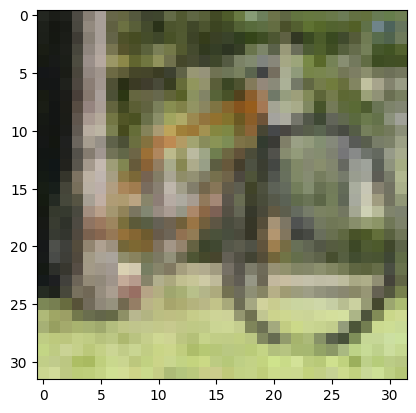

In [23]:
plt.imshow(train_dataset.data[0])

In [24]:
train_dataset.class_to_idx

{'apple': 0,
 'aquarium_fish': 1,
 'baby': 2,
 'bear': 3,
 'beaver': 4,
 'bed': 5,
 'bee': 6,
 'beetle': 7,
 'bicycle': 8,
 'bottle': 9,
 'bowl': 10,
 'boy': 11,
 'bridge': 12,
 'bus': 13,
 'butterfly': 14,
 'camel': 15,
 'can': 16,
 'castle': 17,
 'caterpillar': 18,
 'cattle': 19,
 'chair': 20,
 'chimpanzee': 21,
 'clock': 22,
 'cloud': 23,
 'cockroach': 24,
 'couch': 25,
 'crab': 26,
 'crocodile': 27,
 'cup': 28,
 'dinosaur': 29,
 'dolphin': 30,
 'elephant': 31,
 'flatfish': 32,
 'forest': 33,
 'fox': 34,
 'girl': 35,
 'hamster': 36,
 'house': 37,
 'kangaroo': 38,
 'keyboard': 39,
 'lamp': 40,
 'lawn_mower': 41,
 'leopard': 42,
 'lion': 43,
 'lizard': 44,
 'lobster': 45,
 'man': 46,
 'maple_tree': 47,
 'motorcycle': 48,
 'mountain': 49,
 'mouse': 50,
 'mushroom': 51,
 'oak_tree': 52,
 'orange': 53,
 'orchid': 54,
 'otter': 55,
 'palm_tree': 56,
 'pear': 57,
 'pickup_truck': 58,
 'pine_tree': 59,
 'plain': 60,
 'plate': 61,
 'poppy': 62,
 'porcupine': 63,
 'possum': 64,
 'rabbit': 65,

In [25]:
len(train_dataset.targets)

793

In [26]:
train_dataset.load_dataset(t=0,client=0)

ValueError: too many values to unpack (expected 2)

In [ ]:
train_dataset.tasks

[[20, 79, 93, 54, 52, 65, 0, 1, 48, 74],
 [44, 82, 35, 69, 91, 42, 33, 14, 5, 62],
 [32, 55, 96, 10, 21, 31, 90, 27, 28, 76],
 [80, 71, 66, 58, 23, 70, 60, 72, 17, 18],
 [45, 34, 11, 56, 84, 13, 41, 30, 24, 85],
 [51, 75, 37, 6, 53, 94, 95, 39, 47, 98],
 [36, 7, 50, 3, 63, 59, 9, 77, 64, 92],
 [86, 97, 61, 19, 25, 4, 16, 8, 46, 26],
 [2, 88, 29, 22, 87, 67, 68, 38, 83, 15],
 [12, 81, 43, 73, 78, 40, 99, 57, 89, 49]]

In [ ]:
a = list(np.arange(0,10))
a

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
locs = np.isin(train_dataset.targets, train_dataset.tasks[0]).nonzero()[0]
locs

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [ ]:
len(locs)

243

In [ ]:
train_dataset_1 = torch.utils.data.Subset(train_dataset, locs[:int(len(train_dataset.targets)/2)])

In [ ]:
t_loader = torch.utils.data.DataLoader(train_dataset_1,batch_size = 10)

In [ ]:
len(t_loader) * 10

130

In [ ]:
train_dataset_1.dataset.data

array([[[[211, 211, 213],
         [209, 209, 211],
         [209, 209, 211],
         ...,
         [204, 204, 206],
         [202, 202, 204],
         [200, 200, 202]],

        [[209, 209, 211],
         [206, 206, 208],
         [207, 207, 209],
         ...,
         [201, 201, 203],
         [199, 199, 201],
         [197, 197, 199]],

        [[209, 209, 211],
         [207, 207, 209],
         [207, 207, 209],
         ...,
         [200, 200, 202],
         [198, 198, 200],
         [197, 197, 199]],

        ...,

        [[216, 215, 221],
         [209, 208, 214],
         [203, 202, 208],
         ...,
         [185, 185, 186],
         [191, 190, 192],
         [193, 193, 195]],

        [[216, 215, 221],
         [211, 210, 216],
         [207, 206, 212],
         ...,
         [192, 192, 194],
         [196, 196, 198],
         [198, 198, 200]],

        [[217, 216, 222],
         [213, 212, 218],
         [212, 211, 217],
         ...,
         [198, 198, 200],
        

In [ ]:
500//128

3

In [ ]:
500/64


7.8125